### importamos las librerias a utilizar

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')


### Preparacion de espacio de trabajo

especificamos la ruta de nuestro dataset, un arreglo para guardar las categorias que vayamos encontrando y la dimension a trabajar con nuestras imagenes

In [2]:
DATADIR = '/home/lenin/Documents/datasets/colores'
CATEGORIES = []
IMG_SIZE=5

recorremos el direcotorio excluyendo las imagenes de testeo

In [3]:
for cate in os.listdir(DATADIR):
    if cate == 'testimg': continue
    CATEGORIES.append(cate)
print(f'categorias encontradas: {CATEGORIES}\n total: {len(CATEGORIES)}')

categorias encontradas: ['morado', 'azul', 'rojo', 'amarillo', 'gris', 'rosado', 'negro', 'naranja', 'celeste', 'verde', 'blanco', 'cafe']
 total: 12


### Recoleccion de datos
recorremos el directorio tomando cada imagen segun su respectiva categoria

In [4]:
training_data=[] #var para los datos recolectados
labels=0
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for fname in os.listdir(path):
        img = load_img((path+'/'+fname), target_size=(IMG_SIZE,IMG_SIZE))
        x = img_to_array(img)
        x=x/255
        training_data.append([x,labels])
    labels+=1
print('done')

/home/lenin/.local/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


done


verificamos el total de datos que tenemos

In [5]:
lenofimage = len(training_data)
print(lenofimage)

50400


### Tratamiento de los datos
separamos  nuestra data en img-labels y los tratamos con numpy

In [6]:
X=[]
y=[]
for img, label in training_data:
    X.append(img)
    y.append(label)
print('done')
del training_data

done


verificamos la forma de nuestra data

In [7]:
X=np.array(X)
y=np.array(y)
print('labels',y.shape)
print('img',X.shape)

labels (50400,)
img (50400, 5, 5, 3)


dividimos la data para train y test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(f'train: {len(X_train)}, test: {len(X_test)}')
del X
del y

train: 37800, test: 12600


### Creacion del modelo
creamos la arquitectura del modelo, lo compilamos y finalmente ajustamos

In [10]:
# model = Sequential()
# model.add(Flatten(input_shape=(X_train[0].shape)))
# model.add(Dense(len(CATEGORIES), activation='softmax'))


In [17]:
model = Sequential([
    Conv2D(32, (2,2), activation='relu', padding='SAME', input_shape=X_train[0].shape),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(len(CATEGORIES), activation='softmax'),
])

In [47]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='SAME', input_shape=X_train[0].shape))
model.add(MaxPooling2D((2, 2)))


model.add(Conv2D(64, (3, 3), padding='SAME', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(16, activation='relu'))
model.add(Dense(len(CATEGORIES), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=60, batch_size=40)

Epoch 1/60
945/945 [==============================] - 4s 3ms/step - loss: 0.6832 - accuracy: 0.7771
Epoch 2/60
945/945 [==============================] - 3s 3ms/step - loss: 0.3725 - accuracy: 0.8652
Epoch 3/60
945/945 [==============================] - 3s 3ms/step - loss: 0.3485 - accuracy: 0.8713
Epoch 4/60
945/945 [==============================] - 3s 3ms/step - loss: 0.3361 - accuracy: 0.8741
Epoch 5/60
945/945 [==============================] - 4s 4ms/step - loss: 0.3253 - accuracy: 0.8775
Epoch 6/60
945/945 [==============================] - 3s 3ms/step - loss: 0.3127 - accuracy: 0.8825
Epoch 7/60
945/945 [==============================] - 3s 3ms/step - loss: 0.3074 - accuracy: 0.8834
Epoch 8/60
945/945 [==============================] - 3s 3ms/step - loss: 0.3008 - accuracy: 0.8846
Epoch 9/60
945/945 [==============================] - 3s 3ms/step - loss: 0.2928 - accuracy: 0.8889
Epoch 10/60
945/945 [==============================] - 3s 3ms/step - loss: 0.2885 - accuracy: 0.8906

verificamos la precision en testeo

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

test loss 0.20686516165733337
test accuracy 0.9254761934280396


### Probamos el modelo entrenado

prediccion = cafe


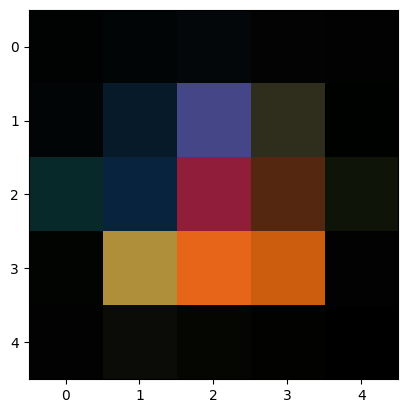

In [60]:
#ruta a nuestras imagenes de test en el directorio, no de la data preparada
path = DATADIR + '/testimg' + '/17.jpeg' 

#tratamos la img con el mismo tamanio y la normalizamos
img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
x = img_to_array(img)
x=x/255

#agrego un eje para que el modelo lo reciba
x = x[np.newaxis, ...]

#imprimo la img y la prediccion
plt.imshow(img)
resp = model.predict(x, verbose=0)
print(f'prediccion = {CATEGORIES[np.argmax(resp[0])]}')

### Exportacion
con el modelo ya funcionando correctamente, lo exportamos para poder utilizarlo en otros proyectos

In [50]:
model.save('mod_color_v1.h5')
model.save_weights("mod_color_v1_weights.h5")

para cargarlos

In [17]:
# # Cargar la estructura del modelo
# modelo_cargado = tf.keras.models.load_model("mod_color_v1.h5")

# # Cargar los pesos del modelo
# modelo_cargado.load_weights("mod_color_v1_weights.h5")
convd 
drop out 
max poling 
padding 
